In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
# Note: you may import library functions from numpy or scipy to compute distances
from scipy.spatial import distance
import scipy
def oracle(x, landmarks):
    # YOUR CODE HERE
    s=np.shape(landmarks)[0]
    distances=np.zeros(s)
    i=0
    while i<s:
    #for i in range(s):
        distances[i]=np.linalg.norm(x-landmarks[i])
        i=i+1
    prod=distances[np.argsort(distances[0])]*distances[np.argsort(distances)[-1]]
    return prod

def make_dataset_regression(size=100, complexity=2, ndim=3, return_landmarks=False):
    # YOUR CODE HERE
    y=np.zeros(size,dtype=float)
    data_mtx=np.zeros([size,ndim],dtype=float)
    landmarks=np.zeros([complexity,ndim],dtype=float)
    
    for i in range(complexity):
        for j in range(ndim):
            landmarks[i][j]=np.random.uniform(0,1)
    for k in range(size):
        for l in range(ndim):
            data_mtx[k][l]=np.random.uniform(0,1)
        y[k]=oracle(data_mtx[k],landmarks)
    
    if return_landmarks==True:
        return data_mtx,y,landmarks
    else:
        return data_mtx,y
    
def make_2d_grid_dataset_regression(size, landmarks):
    # YOUR CODE HERE
    s=int(np.sqrt(size))
    y=np.zeros(round(s*s),dtype=float)
    m=np.linspace(0,1,num=s)
    data_mtx = np.array(np.meshgrid(m,m)).T.reshape(-1,2)
    l=len(y)
    j=0
    while j<l:
    
        y[j]=oracle(data_mtx[j],landmarks)
        j+=1
    return data_mtx,y
    
def oracle_classification(X, pos_landmarks, neg_landmarks):
    # YOUR CODE HERE
    n=np.shape(X)[0]
    y=np.zeros(n,dtype=float)
    
    i=0
    while i<n:
    
        q=oracle(X[i],pos_landmarks)
        r=oracle(X[i],neg_landmarks)
        if q<=r:
            y[i]=1
        else:
            y[i]=0
        i+=1
    return y

def make_dataset_classification(size=100, complexity=2, ndim=3, return_landmarks=False):
    # YOUR CODE HERE
    data_mtx=np.zeros([size,ndim],dtype=float)
    for k in range(size):
        for l in range(ndim):
            data_mtx[k][l]=np.random.uniform(0,1)
    
    
    pos_landmarks=np.zeros([complexity,ndim],dtype=float)
    neg_landmarks=np.zeros([complexity,ndim],dtype=float)
    k=0
    while k<complexity:
    
        for l in range(ndim):
            pos_landmarks[k][l]=np.random.uniform(0,1)
            neg_landmarks[k][l]=np.random.uniform(0,1)
    
        k+=1
        
    y=oracle_classification(data_mtx, pos_landmarks, neg_landmarks)
        
    if return_landmarks==True:
        return data_mtx,y,pos_landmarks, neg_landmarks
    else:
        return data_mtx,y


    
def make_2d_grid_dataset_classification(size, pos_landmarks, neg_landmarks):
    # YOUR CODE HERE
    a=np.sqrt(size)
    m=np.linspace(0,1,num=int(a),endpoint=False)
    
    data_mtx = np.array(np.meshgrid(m,m)).T.reshape(-1,2)
    y=oracle_classification(data_mtx,pos_landmarks,neg_landmarks)
    return data_mtx, y


    
def plot_2d_classification(X_test, y_test, preds, pos_landmarks, neg_landmarks):
    # YOUR CODE HERE
    g = []
    p = []
    fig, ax = plt.subplots (nrows = 1, ncols= 3, figsize = (9, 4))
    
    for c,d in X_test:
        g.append(c)
        p.append(d) 
    len_preds=len(preds)
    acc= np.sum(y_test== preds) / len_preds
    ax[0].scatter(g, p, c= preds, cmap = 'bwr', alpha = 0.2) 
    ax[0].set_title('Prediction')
    
    pos_len=len(pos_landmarks)
    idx=0
    while idx<pos_len:
    
        ax[0].plot(pos_landmarks[idx][0], pos_landmarks[idx][1], marker = 'd', markersize = 10, color = 'blue') 
        ax[0].plot(neg_landmarks [idx][0], neg_landmarks[idx][1], marker = 'd', markersize = 10, color = 'red')
        idx+=1
    ax[1].scatter(g, p, c= y_test, cmap = 'bwr', alpha= 0.2) 
    ax[1].set_title('Truth')
    
    idx=0
    while idx<pos_len:

    
        ax[1].plot(pos_landmarks [idx][0], pos_landmarks[idx][1], marker = 'd', markersize= 10, color= 'blue') 
        ax[1].plot(neg_landmarks [idx][0], neg_landmarks[idx][1], marker = 'd', markersize = 10, color = 'red')
        idx+=1
        
    ax[2].scatter(g, p, c=y_test, cmap = 'gray', alpha = 0.3)
    ax[2].scatter(g, p, c= preds, cmap = 'bwr', alpha=0.2) 
    ax[2].set_title(f' Comparison Acc:{(acc,3)}')
    
    
    idx=0
    while idx<pos_len:
    
        ax[2].plot(pos_landmarks [idx][0], pos_landmarks [idx][1], marker = 'd', markersize = 10, color = 'blue') 
        ax[2].plot(neg_landmarks [idx][0], neg_landmarks[idx][1], marker = 'd', markersize = 10, color = 'red')
        idx+=1
    
def plot_2d_regression(X_test, y_test, preds, landmarks):
    # YOUR CODE HERE
    g = [] 
    p = []
    correlation=scipy.stats.pearsonr(y_test, preds)
    fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (8, 3))
    
    for c,d in X_test:
        g.append(c)
        p.append(d)
    
     
    ax[0].scatter(g, p, c= preds, cmap = 'hot_r')
    ax[0].set_title(f'Prediction cc {round(correlation[0],3)}') 
    l=len(landmarks)
    
    idx=0
    while idx<l:
    
        ax[0].plot(landmarks [idx][0], landmarks[idx][1], marker = 'd', markersize = 10, color= 'black') 
        idx+=1


    ax[1].scatter(g, p, c= y_test, cmap = 'hot_r') 
    ax[1].set_title('Truth')
    
    idx=0
    while idx<l:
    
        ax[1].plot(landmarks [idx][0], landmarks [idx][1], marker = 'd', markersize = 10, color = 'black')
        idx+=1
    

In [3]:
def mse_loss(y, t):
    # YOUR CODE HERE
    
    loss_mse=np.square(np.subtract(t,y)).mean()
    return loss_mse
    
def mse_loss_grad(y, t):
    # YOUR CODE HERE
    #return np.sum(np.subtract(t,y))*(2/len(y))
    #2*np.sum(np.subtract(t,y))/len(y)
    y=np.array(y)
    t=np.array(t)
    mse_grad=2*np.subtract(t,y)/y.size
    return mse_grad
    
def binary_crossentropy_loss(y, t):
    # YOUR CODE HERE
    
    a=(1-t)*np.log(1-y+1e-7)
    b=t*np.log(y+1e-7)
    final_loss=-np.mean(a+b)
    return final_loss
    
def binary_crossentropy_loss_grad(y, t):
    # YOUR CODE 
    epsilon=1e-10
    bin_grad=(t-y)/(t*(1-t)+epsilon)
    return bin_grad

    
def linear_activation(x):
    # YOUR CODE HERE
    return x
    
def linear_activation_grad(x):
    # YOUR CODE HERE
    return 1
    
def logistic_activation(x):
    # YOUR CODE HERE
    
    logistics=1/(1 + np.exp(-x))
    return logistics
    
def logistic_activation_grad(x):
    # YOUR CODE HERE
    l=logistic_activation(x)
    logistic_grad=l*(1-l) 
    return logistic_grad
    
def relu_activation(x, alpha=.05):
    # YOUR CODE HERE
    
    relu=np.maximum(alpha*x,x)
    return relu

def relu_activation_grad(x, alpha=.05):
    # YOUR CODE HERE
    return np.where(x>0, 1, alpha)

The aim of the following functions is to train artificial neural network type of classifiers and regressors. The classification is always intended as binary classification. Here I have written my own implementation for the cases of the multi layer perceptron with backpropagation rule. This implementation is more general and can accept in input arbitrary activation and loss functions for the units in the hidden layer and the output unit. The multi layer perceptron is always assumed to have a single output unit and a single hidden layer.

Note here I have implemented a batch update, that is the model is not updated as it processes each instance, but rather the gradients are stored and averaged together whenever a number of instances equal to batch_size has been observed.

In the following perceptron_model = (W_ih, b_ih, W_ho, b_ho, hidden_activation_func, hidden_activation_func_grad, out_activation_func, out_activation_func_grad, loss, loss_grad), that is the perceptron model is a 10-tuple containing the weight matrix W_ih, the bias vector b_ih, the weight vector W_ho and the bias scalar b_ho, the activation function for the units in the hidden layer hidden_activation_func, and its derivative hidden_activation_func_grad, the activation function for the unit in the output layer out_activation_func and its derivative out_activation_func_grad the loss function loss and the derivative of the loss function loss_grad. The suffix _ih stands for input to hidden, while _ho stands for hidden to output.

a) perceptron_model = init_multilayer_perceptron(in_dim, hidden_dim, hidden_activation_func, hidden_activation_func_grad, out_activation_func, out_activation_func_grad, loss, loss_grad, init_size=1e-3) that takes in input a desired integer input dimension in_dim, a desired integer hidden_dim to specify the number of units in the hidden layer, the desired activation functions for the units in the hidden layer and the output unit, and loss functions and a desired float size init_size. This function initializes the perceptron model with random values. The weight matrices, vectors and scalars are initialised with values in the range (-init_size, +init_size). The weight matrix W_ih has dimensionality equal to in_dim x hidden_dim, the bias vector b_ih is a column vector of size hidden_dim, the weight vector W_ho has size hidden_dim and b_ho is a scalar.

b) y or (y, a, h, h_ih) = forward_multilayer_perceptron(x, perceptron_model, return_pre_activation=False) that takes in input a vector x and a model perceptron_model and returns the output prediction according to the perceptron algorithm. If the flag return_pre_activation is set to True then the output is a 4-tuple where the first element is the predicted output and the second element is the pre-activation value for the output unit, h is a vector containing the post-activations for the units in the hidden layer and h_ih is a vector containing the pre-activations for the units in the hidden layer.

c) grad = compute_gradient_multilayer_perceptron(x, t, perceptron_model) that takes in input a vector x, a target value t, and a model perceptron_model and returns the gradients grad according to the perceptron algorithm. grad = (DW_ih, Db_ih, DW_ho, Db_ho) is a 4-tuple where the first element is the gradient of the weight matrix W_ih, the second element is the gradient of the vector b_ih, the third element is the gradient of the vector W_ho and the last element is the increment of the scalar b_ho.

d) perceptron_model = update_multilayer_perceptron(grads, learning_rate, perceptron_model) that takes in input a list grads of gradients (each a 4-tuple), a learning rate float value of learning_rate and a model perceptron_model and returns an updated model according to the perceptron algorithm, that is, all the updates contained in grads are performed.

e) perceptron_model = fit_multilayer_perceptron(X_train, y_train, hidden_activation_func, hidden_activation_func_grad, out_activation_func, out_activation_func_grad, loss, loss_grad, learning_rate, hidden_dim, batch_size=10, max_n_iter=1000, verbose=False) that takes in input a data matrix X_train a target vector y_train, the desired activation functions for the units in the hidden layer and in the output layer, and loss function, all with their respective derivative functions, a learning rate float value of learning_rate, an integer to define the number of units in the hidden layer hidden_dim, an integer to define the batch size batch_size, that is how many instances are processed before updating the model, and a maximum number of iterations of max_n_iter and returns a fit perceptron model according to the perceptron algorithm. If the flag verbose is set to True then every 100 iterations the loss is computed on the training data set and its value is printed to screen (this is useful to check that the loss is decreasing as training is progressing).

f) scores = score_multilayer_perceptron(X_test, perceptron_model) that takes in input a data matrix X_test, a fit perceptron model perceptron_model and returns a score vector scores containing real values such that larger positive values indicate a preference for the positive class and viceversa for negative values.

g) preds = predict_multilayer_perceptron(X_test, perceptron_model) that takes in input a data matrix X_test, a fit perceptron model perceptron_model and returns a prediction vector preds containing values 1 when predicting the positive class and 0 when predicting the negative class.

In [4]:
def init_multilayer_perceptron(in_dim, hidden_dim, hidden_activation_func, hidden_activation_func_grad, out_activation_func, out_activation_func_grad, loss, loss_grad, init_size=1e-3):
    
    W_ih=np.zeros((in_dim,hidden_dim))
    b_ih=np.zeros(hidden_dim)
    
    i=0
    while i<hidden_dim:
        
    
        b_ih[i]=np.random.uniform(-init_size,init_size)
        i+=1
    b_ih=np.reshape(b_ih, (hidden_dim,1))
    i=0
    while i<in_dim:
    
        for j in range(hidden_dim):
            W_ih[i][j]=np.random.uniform(-init_size,init_size)   
        i+=1
    b_ho=np.random.uniform(-init_size,init_size)
    W_ho=np.zeros(hidden_dim)
    
    i=0
    while i<hidden_dim:
    
        W_ho[i]=np.random.uniform(-init_size,init_size)
        i+=1
    perceptron=(W_ih, b_ih, W_ho, b_ho, hidden_activation_func, hidden_activation_func_grad, out_activation_func, out_activation_func_grad, loss, loss_grad)
    return perceptron
    
def forward_multilayer_perceptron(x, perceptron_model, return_pre_activation=False):
    W_ih, b_ih, W_ho, b_ho, hidden_activation_func, hidden_activation_func_grad, out_activation_func, out_activation_func_grad, loss, loss_grad=perceptron_model
    b_ih=b_ih.T.flatten()
    h_ih=np.dot(x,W_ih)+b_ih
    h=hidden_activation_func(h_ih)
    
    a=np.dot(h,W_ho)+b_ho
    y=out_activation_func(a)
    
    if return_pre_activation==False:
        return y
    return (y, a, h, h_ih)
    
def compute_gradient_multilayer_perceptron(x, t, perceptron_model):
    Wh, bh, Who, bho, hidden_activation_func, hidden_activation_func_grad, out_activation_func, out_activation_func_grad, loss, loss_grad=perceptron_model
    y, a, h, hh=forward_multilayer_perceptron(x, perceptron_model, return_pre_activation=True)
    fault=loss_grad(y,t)
    derive=out_activation_func_grad(y)
    dl=derive*fault
    DW_ho=dl*h
    Db_ho=dl    
    gradin=hidden_activation_func_grad(h)
    dl1=gradin*(Who*dl)
    Dh=dl
    Dh=np.reshape(Dh,(-1,1)) 
    dl=np.reshape(dl,(1,-1))
    x=np.reshape(x,(-1,1))
    DWh=x@dl    
    return (DWh, Dh, DW_ho, Db_ho)
    
    
def update_multilayer_perceptron(grads, learning_rate, perceptron_model):
    # YOUR CODE HERE
        
    W_ih, b_ih, W_ho, b_ho, hidden_activation_func, hidden_activation_func_grad, out_activation_func, out_activation_func_grad, loss, loss_grad=perceptron_model 
    DW_ih, Db_ih, DW_ho, Db_ho=grads
    W_ih=W_ih+learning_rate*DW_ih
    b_ih=b_ih+learning_rate*Db_ih
    W_ho=W_ho+learning_rate*DW_ho
    b_ho=b_ho+learning_rate*Db_ho
    
    perceptron=(W_ih, b_ih, W_ho, b_ho, hidden_activation_func, hidden_activation_func_grad, out_activation_func, out_activation_func_grad, loss, loss_grad)
    return perceptron
    
def fit_multilayer_perceptron(X_train, y_train, hidden_activation_func, hidden_activation_func_grad, out_activation_func, out_activation_func_grad, loss, loss_grad, learning_rate, hidden_dim, batch_size=10, max_n_iter=1000, verbose=False):
    # YOUR CODE HERE
    dim=np.shape(X_train)[1]
    
    percept=init_multilayer_perceptron(dim, hidden_dim, hidden_activation_func, hidden_activation_func_grad, out_activation_func, out_activation_func_grad, loss, loss_grad, init_size=1e-3)
    leng=np.shape(X_train)[0]
    j=0
    while j<max_n_iter:
    
        if verbose==True and j%100==0:
            preds=predict_multilayer_perceptron(X_train, percept)
            l=loss(preds,y_train)
            print('Loss: ',l.mean())
        for i in range(leng):
            derive=compute_gradient_multilayer_perceptron(X_train[i], y_train[i], percept)
            percept=update_multilayer_perceptron(derive, learning_rate, percept)
        j+=1
    return percept
    
def score_multilayer_perceptron(X_test, perceptron_model):
    # YOUR CODE HERE
    pt=np.zeros(np.shape(X_test)[0],dtype=float)
    l=np.shape(X_test)[0]
    i=0
    while i<l:
    
        pt[i]=forward_multilayer_perceptron(X_test[i], perceptron_model,return_pre_activation=False)
        i+=1
    return pt
    
def predict_multilayer_perceptron(X_test, perceptron_model):
    # YOUR CODE HERE
    l=np.shape(X_test)[0]
    g=np.zeros(l)
    pt=score_multilayer_perceptron(X_test, perceptron_model)
    i=0
    while i<len(pt):
    
        
        if pt[i]>0:
            g[i]=1
        else:
            g[i]=0
        i+=1
    return g

/var/folders/39/9qjxsvtx70b08fl151rflxbh0000gn/T/ipykernel_93692/2045021039.py:42: RuntimeWarning: overflow encountered in exp
  logistics=1/(1 + np.exp(-x))


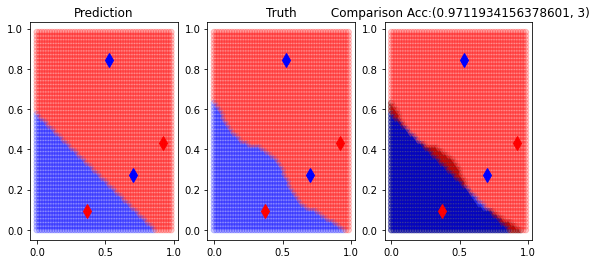

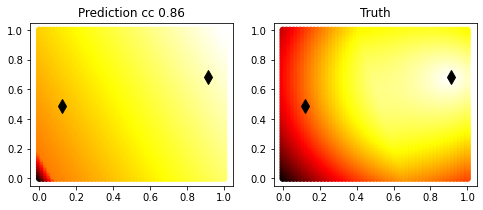

In [5]:
# classification
data, y, pos_landmarks, neg_landmarks = make_dataset_classification(size=300, complexity=2, ndim=2, return_landmarks=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.3)
X_test, y_test = make_2d_grid_dataset_classification(3000, pos_landmarks, neg_landmarks)

perceptron_model = fit_multilayer_perceptron(X_train, y_train, 
                                             relu_activation, relu_activation_grad, 
                                             logistic_activation, logistic_activation_grad, 
                                             binary_crossentropy_loss, binary_crossentropy_loss_grad, 
                                             learning_rate=1e-2, hidden_dim=4, batch_size=10, 
                                             max_n_iter=1000, verbose=False)
preds = predict_multilayer_perceptron(X_test, perceptron_model)
plot_2d_classification(X_test, y_test, preds, pos_landmarks, neg_landmarks)

# regression
data, y, landmarks = make_dataset_regression(size=300, complexity=2, ndim=2, return_landmarks=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.3)
X_test, y_test = make_2d_grid_dataset_regression(3000, landmarks)

perceptron_model = fit_multilayer_perceptron(X_train, y_train, 
                                             relu_activation, relu_activation_grad, 
                                             linear_activation, linear_activation_grad, 
                                             mse_loss, mse_loss_grad, 
                                             learning_rate=1e-2, hidden_dim=4, batch_size=10, 
                                             max_n_iter=1000, verbose=False)
preds = score_multilayer_perceptron(X_test, perceptron_model)
plot_2d_regression(X_test, y_test, preds, landmarks)